In [1]:
# mount the drive 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# imports 

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

np.set_printoptions(suppress=True)

In [3]:
# references (for cool visualization) :
# https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/EDA%20and%20Data%20Cleaning.ipynb 

housing_dataset_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
print(housing_dataset_train)

housing_dataset_test = pd.read_csv('/content/sample_data/california_housing_test.csv')
print(housing_dataset_test)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

In [4]:
# train head 
housing_dataset_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9f317cb10>,
      dtype=object)

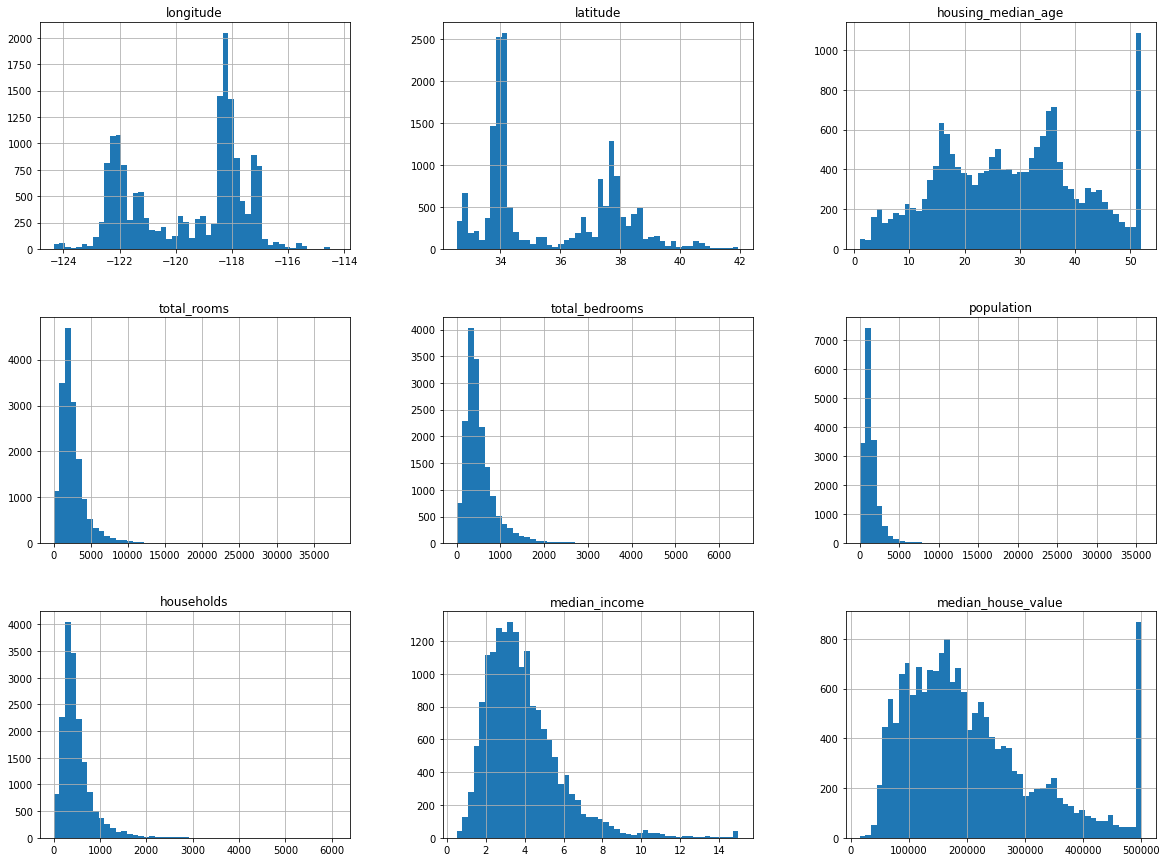

In [5]:
# plot histograms for train data 
housing_dataset_train.hist(bins=50, figsize=(20, 15))

In [7]:
california = plt.imread('/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/training/california.png')

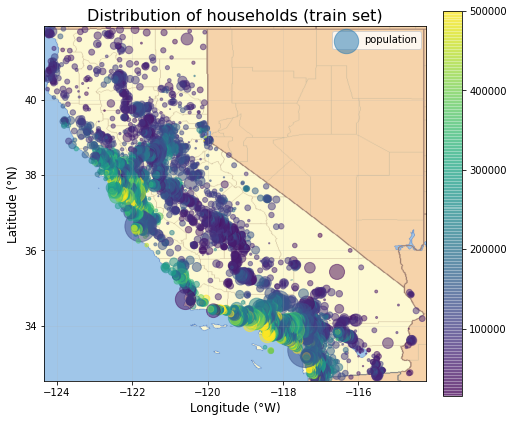

In [16]:
# train data visualization

plt.figure(figsize=(7.5,7.5))
california = plt.imread('/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/training/california.png')
plt.imshow(california,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=housing_dataset_train['longitude'],
            y=housing_dataset_train['latitude'], 
            alpha=0.5,
            s=housing_dataset_train['population']/30,
            c=housing_dataset_train['median_house_value'],
            #cmap=plt.get_cmap("jet"),
            zorder=1,
            label='population')

plt.colorbar(fraction=0.046, pad=0.04)
plt.xlabel('Longitude (°W)', size=12)
plt.ylabel('Latitude (°N)', size=12)
plt.grid(alpha=0.2)
plt.title("Distribution of households (train set)",size=16)
plt.legend()
plt.savefig('/content/california_pretty.pdf')

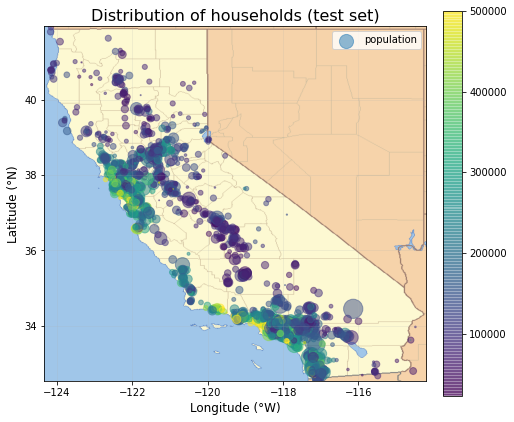

In [18]:
# train data visualization

plt.figure(figsize=(7.5,7.5))
california = plt.imread('/content/drive/MyDrive/MasterThesis/CaliforniaHousingDatasetTests/training/california.png')
plt.imshow(california,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=housing_dataset_test['longitude'],
            y=housing_dataset_test['latitude'], 
            alpha=0.5,
            s=housing_dataset_test['population']/30,
            c=housing_dataset_test['median_house_value'],
            #cmap=plt.get_cmap("jet"),
            zorder=1,
            label='population')

plt.colorbar(fraction=0.046, pad=0.04)
plt.xlabel('Longitude (°W)', size=12)
plt.ylabel('Latitude (°N)', size=12)
plt.grid(alpha=0.2)
plt.title("Distribution of households (test set)",size=16)
plt.legend()
plt.savefig('/content/california_pretty.pdf')

In [ ]:
# converting the dataframes into np array to be used for model training

train_data_df = housing_dataset_train.iloc[:, 0:-1]
train_label_df = housing_dataset_train.iloc[:, -1]

train_data = train_data_df.to_numpy()
train_label = train_label_df.to_numpy() 

val_and_test_data_df = housing_dataset_test.iloc[:, 0:-1]
val_and_test_label_df = housing_dataset_test.iloc[:, -1]

val_and_test_data = val_and_test_data_df.to_numpy() 
val_and_test_label = val_and_test_label_df.to_numpy() 

val_data, test_data, val_label, test_label = train_test_split(val_and_test_data, val_and_test_label, test_size=0.5)


#val_data, test_data, val_labels, test_labels = train_test_split(x_test_combined, y_test_combined, test_size=0.5)

print('train data shape : ', train_data.shape)
print('train label shape : ', train_label.shape)

print('val data shape : ', val_data.shape)
print('val label shape : ', val_label.shape)

print('test data shape : ', test_data.shape)
print('test label shape : ', test_label.shape) 

#https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [ ]:
plt.hist(housing_dataset['longitude'], bins=50, figsize=(15,15))
plt.show()

In [ ]:

# UNCOMMENT WHEN USING COLAB CSV
#plotting the correlation heatmap 

train_file = '/content/sample_data/california_housing_train.csv'
test_file = '/content/sample_data/california_housing_test.csv'

train = pd.read_csv(train_file)
test_combined = pd.read_csv(test_file)

val, test = train_test_split(test_combined, test_size=0.5)


train_labels = train[target]
val_labels = val[target]
test_labels = test[target] 

train_data = train.drop(target, 1)
print(train_data.shape)
val_data = val.drop(target, 1)
test_data = test.drop(target, 1)

C_mat_train = train_data.corr()
C_mat_val = val_data.corr() 
C_mat_test = test_data.corr()

fig = plt.figure(figsize = (30, 8))

plt.subplot(131)
plt.title('correlation matrix for train')
sns.heatmap(C_mat_train, square = True, annot=True)

plt.subplot(132)
plt.title('correlation matrix for val')
sns.heatmap(C_mat_val, square = True, annot=True)

plt.subplot(133)
plt.title('correlation matrix for test')
sns.heatmap(C_mat_test, square = True, annot=True)
plt.show()


In [ ]:
#sns.pairplot(train[column_names], diag_kind='kde')

In [ ]:
#sns.pairplot(val[column_names], diag_kind='kde')

In [ ]:
#sns.pairplot(test[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income']], diag_kind='kde')

In [ ]:
#train.describe().transpose()[['mean', 'std']]

In [ ]:
#val.describe().transpose()[['mean', 'std']]

In [ ]:
#test.describe().transpose()[['mean', 'std']]

In [ ]:
'''
#feature_names = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]
#target_names = ["MedHouseVal"]

normalized = MinMaxScaler() 
#scaler = StandardScaler()

train = pd.DataFrame(normalized.fit_transform(train_data), columns=column_names)
#train_labels = pd.DataFrame(normalized.fit_transform(train_labels), columns=target) 

val = pd.DataFrame(normalized.fit_transform(val_data), columns=column_names)
#val_labels = pd.DataFrame(normalized.fit_transform(val_labels), columns=target) 

test = pd.DataFrame(normalized.fit_transform(test_data), columns=column_names)
#test_labels = pd.DataFrame(normalized.fit_transform(test_labels), columns=target) 

#train = pd.DataFrame(scaler.fit_transform(train_data), columns=column_names)
#train_labels = pd.DataFrame(scaler.fit_transform(train_labels), columns=target) 

#val = pd.DataFrame(scaler.fit_transform(val_data), columns=column_names)
#val_labels = pd.DataFrame(scaler.fit_transform(val_labels), columns=target) 

#test = pd.DataFrame(scaler.fit_transform(test_data), columns=column_names)
#test_labels = pd.DataFrame(scaler.fit_transform(test_labels), columns=target) 

#print(train.columns)
x_train = train_data
y_train = train_label

x_validation = val_data
y_validation = val_label

x_test = test_data
y_test = test_label

#x_train = np.array(train_data)
#y_train = np.array(train_labels)

#x_validation = np.array(val_data)
#y_validation = np.array(val_labels)

#x_test = np.array(test_data)
#y_test = np.array(test_labels)

print('dimensions of x_train ', x_train.shape)
print('dimensions of x_validation ', x_validation.shape)
print('dimensions of x_test ', x_test.shape)

print('dimensions of y_train ', y_train.shape)
print('dimensions of y_validation ', y_validation.shape)
print('dimensions of y_test ', y_test.shape)
'''

In [ ]:
#test_index = np.random.randint(x_test.shape[0])

#print('Before normalization\n')
#print(x_train[0])
#print(y_train[0])

#print(x_validation[0])
#print(y_validation[0])

#print(x_test[0])
#print(y_test[0])

#y_train = np.reshape(y_train, (-1, 1))
#y_validation = np.reshape(y_validation, (-1, 1))
#y_test = np.reshape(y_test, (-1, 1))

#scaler = StandardScaler()

#x_train_normalized = scaler.fit_transform(x_train)
#x_validation_normalized = scaler.fit_transform(x_validation)
#x_test_normalized = scaler.fit_transform(x_test)

#y_train = scaler.fit_transform(y_train)
#y_validation = scaler.fit_transform(y_validation)
#y_test = scaler.fit_transform(y_test)

#print('\nAfter normailzation\n')
#print(x_train_normalized[0])
#print(y_train[0])

#print(x_validation_normalized[0])
#print(y_validation[0])

#print(x_test_normalized[0])
#print(y_test[0])


#x_train_normalized = normalizer.adapt(np.array(x_train))
#x_validation_normalized = normalizer.adapt(np.array(x_validation))
#x_test_normalized = normalizer.adapt(np.array(x_test))

In [ ]:
#hyperparameters
epoch=500
batch_size=1024
optimizer='sgd'
loss='mse'
metrics=['mae']
dropout_rate=0.3
activation='relu'

#early_stopping parameters
patience=
monitor='val_loss'

In [ ]:
def lr_scheduler(epoch, lr):
    if epoch < 100:
        return lr
    elif 100 < epoch < 200:
        return lr * 0.01
    else: 
        return lr* 0.001

early_stopping = tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=patience)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

callbacks = [early_stopping, lr_scheduler]

In [ ]:
#dense_model

dense_model = tf.keras.Sequential([tf.keras.layers.Dense(512, activation=activation, input_shape=train_data.shape[1:]),
                                   tf.keras.layers.Dense(1)])


dense_model.compile(loss=loss,
                    optimizer=optimizer,
                    metrics=metrics)

dense_model.summary()

history_dense_model = dense_model.fit(train_data_normalized,
                                      train_label_normalized,
                                      epochs=epoch,
                                      batch_size=batch_size,
                                      validation_data=(val_data_normalized, val_data_normalized),
                                      callbacks=callbacks)

plt.plot(history_dense_model.history['loss'], label='train loss')
plt.plot(history_dense_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history_dense_model.history['mae'], label='train_mae')
plt.plot(history_dense_model.history['val_mae'], label='val_mae')
plt.legend()
plt.show()

mean_squared_error_test_dense_model = dense_model.evaluate(test_data, test_label, batch_size=batch_size)
print('mean squared error ', mean_squared_error_test_dense_model)

In [ ]:
#dense_model_with_dropout
dense_model_with_dropout = tf.keras.Sequential([tf.keras.layers.Dense(1024, activation=activation, input_shape=x_train.shape[1:]),
                                                tf.keras.layers.Dropout(dropout_rate),
                                                tf.keras.layers.Dense(1)])

dense_model_with_dropout.compile(loss=loss,
                                 optimizer=optimizer,
                                 metrics=metrics)

dense_model_with_dropout.summary()

history_dense_model_with_dropout = dense_model_with_dropout.fit(x_train,
                                                                y_train,
                                                                epochs=epoch,
                                                                batch_size=batch_size,
                                                                validation_data=(x_validation, y_validation),
                                                                callbacks=callbacks)

plt.plot(history_dense_model_with_dropout.history['loss'], label='train loss')
plt.plot(history_dense_model_with_dropout.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history_dense_model_with_dropout.history['mae'], label='train_mae')
plt.plot(history_dense_model_with_dropout.history['val_mae'], label='val_mae')
plt.legend()
plt.show()

mean_squared_error_test_dense_model_with_dropout = dense_model_with_dropout.evaluate(x_test, y_test, batch_size=batch_size)
print('mean squared error ', mean_squared_error_test_dense_model_with_dropout)

# possible reasons as to why the validation statistics are better than training statistics: (https://www.pyimagesearch.com/2019/10/14/why-is-my-validation-loss-lower-than-my-training-loss/)
#R1 : Regularization applied during training, but not during validation/testing
#R2 : Training loss is measured during each epoch while validation loss is measured after each epoch
#R3 : The validation set may be easier than the training set

In [ ]:
number_of_testing_samples = 500
print(x_test.shape[0])
start_index = np.random.randint(0, x_test.shape[0]-250)

#indices_to_be_used_for_testing = sorted([random.randrange(1, x_test.shape[0], 1) for i in range(number_of_testing_samples)])

x_test_input = x_test[start_index:start_index+number_of_testing_samples]
y_ground_truth = y_test[start_index:start_index+number_of_testing_samples]

x_test_input = np.array(x_test_input)
y_ground_truth = np.array(y_ground_truth)

y_test_output_dense = dense_model.predict(x_test_input)
y_test_output_dense_with_dropout = dense_model_with_dropout.predict(x_test_input)

diff_gt_dense = []
diff_gt_dense_with_dropout = []

for i in range(len(x_test_input)):
    diff_gt_dense.append(y_ground_truth-y_test_output_dense)
    diff_gt_dense_with_dropout.append(y_ground_truth-y_test_output_dense_with_dropout)
    print('Ground Truth ', float(y_ground_truth[i]))
    print('Dense model prediction ', float(y_test_output_dense[i]))
    print('Dense model with dropout prediction ', float(y_test_output_dense_with_dropout[i]))

plt.figure(figsize=(105, 8))
plt.plot(y_ground_truth, marker='o', label='ground truth')
plt.grid('on', alpha=0.2)
plt.plot(y_test_output_dense, marker='o',  label='dense prediction')
plt.plot(y_test_output_dense_with_dropout, marker='o', label='dense with dropout prediction')

plt.legend()
plt.xticks(np.linspace(0, number_of_testing_samples, number_of_testing_samples+1))
plt.xlabel('Data Sample')
plt.ylabel('Target')
plt.show()

print('Average error between gt and dense ', dense_model.evaluate(x_test_input, y_ground_truth, batch_size=batch_size))
print('Average error between gt and dense with dropout ', dense_model_with_dropout.evaluate(x_test_input, y_ground_truth, batch_size=batch_size))

In [ ]:
#installing LIME explainer 
!pip install lime
import lime 
import lime.lime_tabular

In [ ]:
print(type(x_train))
print(x_train)
print(type(train_data))
print(train_data)
print(type(housing_dataset))
print(housing_dataset)

x_train_np = np.array(x_train)
x_test_np = np.array(x_test)
#print('feature names ', housing_dataset.feature_names)
#print('target names ', housing_dataset.target_names)
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_np, feature_names=housing_dataset.feature_names, class_names=housing_dataset.target_names, discretize_continuous=True, mode='regression')

In [ ]:
i = np.random.randint(0, test.shape[0])
print(i)
#exp = explainer.explain_instance(x_test[i], dense_model.predict(x_test_input[i]), num_features=2, top_labels=1)

In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
#Reference [general purpose] 
#https://www.kdnuggets.com/2020/01/explaining-black-box-models-ensemble-deep-learning-lime-shap.html
#https://medium.com/@gurupratap.matharu/end-to-end-machine-learning-project-on-predicting-housing-prices-using-regression-7ab7832840ab
#https://www.kaggle.com/mejbahahammad/building-a-regression-multi-layer-perceptron-mlp
#https://jmyao17.github.io/Kaggle/California_Housing_Prices.html
#https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

#EXPLORING LIME ON HOUSING DATASET
#https://www.katzentante.at/lime-on-regression-model-house-prices/ [Exploring lime on the house prices dataset]
#https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html
#https://marcotcr.github.io/lime/tutorials/Using%2Blime%2Bfor%2Bregression.html

#Applying NN on CHD
#https://github.com/vineetver/California-housing-prediction-NN/blob/master/Neural%20Nets.ipynb

#REGRESSION USING MLP
#https://www.machinecurve.com/index.php/2019/07/30/creating-an-mlp-for-regression-with-keras/
#https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/
#https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-for-regression
#https://www.tensorflow.org/tutorials/keras/regression
# https://d2l.ai/chapter_multilayer-perceptrons/kaggle-house-price.html

#evaluating REGRESSION MODELS 
#https://machinelearningmastery.com/regression-metrics-for-machine-learning/#:~:text=We%20cannot%20calculate%20accuracy%20for%20a%20regression%20model.&text=This%20makes%20sense%20if%20you%20think%20about%20it.&text=There%20are%20three%20error%20metrics,Mean%20Squared%20Error%20(RMSE).

